In [115]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [116]:
# collected data
current = np.array([0, 0.12, 0.25, 0.37, 0.49, 0.6, 0.71, 0.82, 0.92, 1.03, 1.14])
voltage = np.array([4.994, 4.777, 4.694, 4.610, 4.560, 4.460, 4.393, 
                    4.360, 4.293, 4.276, 4.243])

# estimated uncertainty of 1%
delta_i = 0.01 * current

# calculate linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(current, voltage)
line = (slope*current)+intercept
print('voltage =',round(slope,3), '* current +', round(intercept,3))
print('r value:', round(r_value,3))
print('p value:', '%.2e'%p_value)
print('standard error:', round(std_err,3))

voltage = -0.615 * current + 4.875
r value: -0.975
p value: 3.36e-07
standard error: 0.047


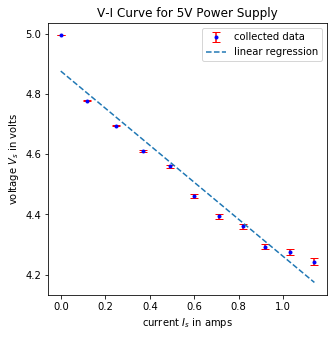

In [117]:
# plot data with errorbars and linear regression
plt.figure(figsize=(5,5))
plt.errorbar(current, voltage, yerr=delta_i, fmt='b.', ecolor='r', 
             capsize=4, label='collected data')
plt.errorbar(current, line, fmt='--', label='linear regression')
plt.title('V-I Curve for 5V Power Supply')
plt.xlabel('current $I_s$ in amps')
plt.ylabel('voltage $V_s$ in volts')
plt.legend()

In [106]:
# function to calculate Rm from input Rx and Vm
def calc_rm(rx,vm):
    rm = (vm * rx) / (5 - vm)
    return rm

In [107]:
# arrays to store collected data and calculated values
Rx_values = np.array([2.2,4.4,6.6,8.8,10.0,12.2])
Vm_values = np.array([4.07,3.43,2.96,2.62,2.34,2.13])
Rm_values = np.zeros(6)

# calculate Rm from data
i = 0
while i<6:
    current_rx = Rx_values[i]
    current_vm = Vm_values[i]
    Rm_values[i] = round(calc_rm(current_rx,current_vm),2)
    i+=1

avg_Rm = round(np.average(Rm_values),2)

In [110]:
# uncertainty calculations
Vm_uncertainty = 0.01  # estimated uncertainty of 1% on Vm
Rx_uncertainty = 0.05  # resistor tolerance of 5%
Rm_uncertainty = round(np.sqrt((Rx_uncertainty**2)
                               +(Vm_uncertainty**2)
                               +(Vm_uncertainty**2)),3)

In [111]:
# the results
print('all Rm values:',Rm_values)
print('average Rm value:',avg_Rm, '+/-', 100*Rm_uncertainty,'%')

all Rm values: [9.63 9.61 9.58 9.69 8.8  9.05]
average Rm value: 9.39 +/- 5.2 %
